# Airline Passengers Prediction Using LSTM

## Problem Description

The data contains the number of international airline passengers for each month, ranges from January 1949 to December 1960 (12 years).

The task is to predict the number of international airline passengers in units of 1,000.

Data Source: https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv

## Methodology

The *Long Short-Term Memory Network* (known as *LSTM*), a powerful type of *Recurrent Neural Networks*, can address time series prediction problems in machine learning and achieve state-of-the-art results. A number of LSTMs for this problem is developed and compared using various approaches:
1. Framing as a regression problem
2. Using window method
3. Using time steps

### 1. Framing as a Regression Problem

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [2]:
# fix random seed for reproducibility
seed = 13
np.random.seed(seed)

In [3]:
# load data
url = 'https://raw.githubusercontent.com/imranture/datasets/master/airline-passengers.csv'
data = pd.read_csv(url, header = 0, usecols = [1])
print(data.shape)
data.head(10)
dataset = data.values

(144, 1)


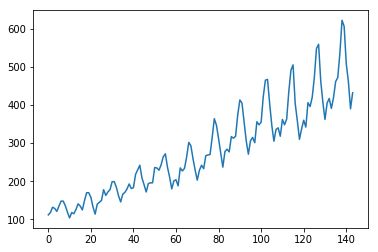

In [4]:
# plot dataset
plt.plot(dataset)
plt.show();

In [5]:
# normalize dataset
scaler = MinMaxScaler(feature_range = (0, 1))
dataset_transformed = dataset.astype('float')
dataset_transformed  = scaler.fit_transform(dataset_transformed)

C:\Users\e93689\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [6]:
# split into train and test sets
train_size = int(len(dataset_transformed) * 0.67)
test_size = len(dataset_transformed) - train_size
train, test = dataset_transformed[0:train_size, :], dataset_transformed[train_size:len(dataset_transformed), :]
print(len(train), len(test))

96 48


In [7]:
# define a function to convert an array of values into a dataset matrix
def create_matrix(array, look_back = 1):
    t0, t1 = [], []
    for i in range(len(array) - look_back - 1):
        a = array[i:(i + look_back), 0]
        t0.append(a)
        t1.append(array[i + look_back, 0])
    return np.array(t0), np.array(t1)

In [8]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_matrix(train, look_back)
testX, testY = create_matrix(test, look_back)

In [9]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [10]:
# create and fit LSTM network
model = Sequential()
model.add(LSTM(4, input_shape = (1, look_back)))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model.fit(trainX, trainY, epochs = 100, batch_size = 1, verbose = 2)

W0121 13:26:13.867129 25832 module_wrapper.py:139] From C:\Users\e93689\AppData\Roaming\Python\Python36\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0121 13:26:13.881092 25832 module_wrapper.py:139] From C:\Users\e93689\AppData\Roaming\Python\Python36\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0121 13:26:13.884083 25832 module_wrapper.py:139] From C:\Users\e93689\AppData\Roaming\Python\Python36\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0121 13:26:14.146383 25832 module_wrapper.py:139] From C:\Users\e93689\AppData\Roaming\Python\Python36\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0121 13:26:14.433433 25

Epoch 1/100


W0121 13:26:15.515355 25832 module_wrapper.py:139] From C:\Users\e93689\AppData\Roaming\Python\Python36\site-packages\keras\backend\tensorflow_backend.py:206: The name tf.variables_initializer is deprecated. Please use tf.compat.v1.variables_initializer instead.



 - 1s - loss: 0.0364
Epoch 2/100
 - 0s - loss: 0.0169
Epoch 3/100
 - 0s - loss: 0.0133
Epoch 4/100
 - 0s - loss: 0.0125
Epoch 5/100
 - 0s - loss: 0.0115
Epoch 6/100
 - 0s - loss: 0.0107
Epoch 7/100
 - 0s - loss: 0.0098
Epoch 8/100
 - 0s - loss: 0.0088
Epoch 9/100
 - 0s - loss: 0.0079
Epoch 10/100
 - 0s - loss: 0.0071
Epoch 11/100
 - 0s - loss: 0.0062
Epoch 12/100
 - 0s - loss: 0.0055
Epoch 13/100
 - 0s - loss: 0.0048
Epoch 14/100
 - 0s - loss: 0.0041
Epoch 15/100
 - 0s - loss: 0.0036
Epoch 16/100
 - 0s - loss: 0.0032
Epoch 17/100
 - 0s - loss: 0.0029
Epoch 18/100
 - 0s - loss: 0.0026
Epoch 19/100
 - 0s - loss: 0.0024
Epoch 20/100
 - 0s - loss: 0.0023
Epoch 21/100
 - 0s - loss: 0.0022
Epoch 22/100
 - 0s - loss: 0.0021
Epoch 23/100
 - 0s - loss: 0.0021
Epoch 24/100
 - 0s - loss: 0.0021
Epoch 25/100
 - 0s - loss: 0.0020
Epoch 26/100
 - 0s - loss: 0.0021
Epoch 27/100
 - 0s - loss: 0.0021
Epoch 28/100
 - 0s - loss: 0.0021
Epoch 29/100
 - 0s - loss: 0.0021
Epoch 30/100
 - 0s - loss: 0.0021
E

In [11]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [12]:
# invert scaling
trainY = scaler.inverse_transform([trainY])
testY = scaler.inverse_transform([testY])
trainPredict = scaler.inverse_transform(trainPredict)
testPredict = scaler.inverse_transform(testPredict)

In [13]:
# estimate model performance
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:, 0]))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:, 0]))
print(f'Train Score: {trainScore} RMSE')
print(f'Test Score: {testScore} RMSE')

Train Score: 23.11360981646912 RMSE
Test Score: 47.43927745299061 RMSE


The model has an average error of `23` passengers (in thousands) on the training dataset and `47` passengers (in thousands) on the test dataset.

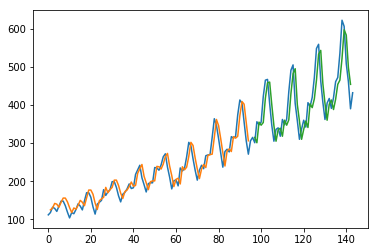

In [14]:
# shift train predictions for plotting
trainPredictPlot = np.zeros_like(dataset)
trainPredictPlot[look_back:len(trainPredict) + look_back, :] = trainPredict
trainPredictPlot = trainPredictPlot.astype('float')
trainPredictPlot[trainPredictPlot == 0] = np.nan

# shift test predictions for plotting
testPredictPlot = np.zeros_like(dataset)
testPredictPlot[len(trainPredict) + (look_back * 2) + 1:len(dataset) - 1, :] = testPredict
testPredictPlot = testPredictPlot.astype('float')
testPredictPlot[testPredictPlot == 0] = np.nan

# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

### 2. Using Window Method
Recent multiple time steps can be used to make the prediction for the next time step, instead using the very recent time step only. This is known as a *window method* and the size of the window is a parameter that can be tuned for each problem. For example, given the current time (t) we want to predict the value at the next time in the sequence (t+1), we can use the current time (t) as well as the two prior times (t-1 and t-2) as input variables. When phrased as a regression problem the input variables are t-2, t-1, t and the output variable is t+1.

Let's increase the size of window from 1 to `3`.

In [15]:
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_matrix(train, look_back)
testX, testY = create_matrix(test, look_back)

A sample of the dataset with this formulation looks as follows:

In [16]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [17]:
# create and fit LSTM network
model = Sequential()
model.add(LSTM(4, input_shape = (1, look_back)))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model.fit(trainX, trainY, epochs = 100, batch_size = 1, verbose = 2)

Epoch 1/100
 - 2s - loss: 0.0631
Epoch 2/100
 - 0s - loss: 0.0288
Epoch 3/100
 - 0s - loss: 0.0193
Epoch 4/100
 - 0s - loss: 0.0167
Epoch 5/100
 - 0s - loss: 0.0151
Epoch 6/100
 - 0s - loss: 0.0137
Epoch 7/100
 - 0s - loss: 0.0126
Epoch 8/100
 - 0s - loss: 0.0113
Epoch 9/100
 - 0s - loss: 0.0100
Epoch 10/100
 - 0s - loss: 0.0091
Epoch 11/100
 - 0s - loss: 0.0082
Epoch 12/100
 - 0s - loss: 0.0075
Epoch 13/100
 - 0s - loss: 0.0069
Epoch 14/100
 - 0s - loss: 0.0064
Epoch 15/100
 - 0s - loss: 0.0060
Epoch 16/100
 - 0s - loss: 0.0057
Epoch 17/100
 - 0s - loss: 0.0056
Epoch 18/100
 - 0s - loss: 0.0053
Epoch 19/100
 - 0s - loss: 0.0054
Epoch 20/100
 - 0s - loss: 0.0052
Epoch 21/100
 - 0s - loss: 0.0051
Epoch 22/100
 - 0s - loss: 0.0050
Epoch 23/100
 - 0s - loss: 0.0049
Epoch 24/100
 - 0s - loss: 0.0049
Epoch 25/100
 - 0s - loss: 0.0047
Epoch 26/100
 - 0s - loss: 0.0047
Epoch 27/100
 - 0s - loss: 0.0047
Epoch 28/100
 - 0s - loss: 0.0046
Epoch 29/100
 - 0s - loss: 0.0045
Epoch 30/100
 - 0s - lo

In [18]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [19]:
# invert scaling
trainY = scaler.inverse_transform([trainY])
testY = scaler.inverse_transform([testY])
trainPredict = scaler.inverse_transform(trainPredict)
testPredict = scaler.inverse_transform(testPredict)

In [20]:
# estimate model performance
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:, 0]))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:, 0]))
print(f'Train Score: {trainScore} RMSE')
print(f'Test Score: {testScore} RMSE')

Train Score: 23.498048894904635 RMSE
Test Score: 66.57249495608873 RMSE


The model has an average error of `24` passengers (in thousands) on the training dataset and `67` passengers (in thousands) on the test dataset.

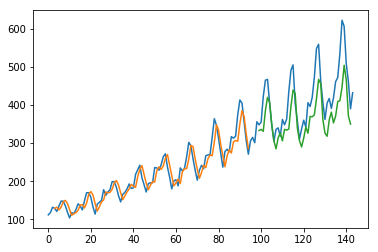

In [21]:
# shift train predictions for plotting
trainPredictPlot = np.zeros_like(dataset)
trainPredictPlot[look_back:len(trainPredict) + look_back, :] = trainPredict
trainPredictPlot = trainPredictPlot.astype('float')
trainPredictPlot[trainPredictPlot == 0] = np.nan

# shift test predictions for plotting
testPredictPlot = np.zeros_like(dataset)
testPredictPlot[len(trainPredict) + (look_back * 2) + 1:len(dataset) - 1, :] = testPredict
testPredictPlot = testPredictPlot.astype('float')
testPredictPlot[testPredictPlot == 0] = np.nan

# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

### 3. Using Time Steps
Instead of phrasing the past observations as separate input features, we can use them as time steps of the one input feature. This is indeed a more accurate way to frame such time series prediction problem, compared to the window method.

In [22]:
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_matrix(train, look_back)
testX, testY = create_matrix(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [23]:
# create and fit LSTM network
model = Sequential()
model.add(LSTM(4, input_shape = (look_back, 1)))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model.fit(trainX, trainY, epochs = 100, batch_size = 1, verbose = 2)

Epoch 1/100
 - 4s - loss: 0.0514
Epoch 2/100
 - 1s - loss: 0.0211
Epoch 3/100
 - 1s - loss: 0.0178
Epoch 4/100
 - 1s - loss: 0.0162
Epoch 5/100
 - 1s - loss: 0.0148
Epoch 6/100
 - 1s - loss: 0.0131
Epoch 7/100
 - 1s - loss: 0.0118
Epoch 8/100
 - 1s - loss: 0.0104
Epoch 9/100
 - 1s - loss: 0.0091
Epoch 10/100
 - 1s - loss: 0.0081
Epoch 11/100
 - 1s - loss: 0.0070
Epoch 12/100
 - 1s - loss: 0.0062
Epoch 13/100
 - 1s - loss: 0.0057
Epoch 14/100
 - 1s - loss: 0.0050
Epoch 15/100
 - 1s - loss: 0.0047
Epoch 16/100
 - 1s - loss: 0.0046
Epoch 17/100
 - 1s - loss: 0.0044
Epoch 18/100
 - 1s - loss: 0.0044
Epoch 19/100
 - 1s - loss: 0.0044
Epoch 20/100
 - 0s - loss: 0.0045
Epoch 21/100
 - 1s - loss: 0.0042
Epoch 22/100
 - 1s - loss: 0.0042
Epoch 23/100
 - 1s - loss: 0.0042
Epoch 24/100
 - 1s - loss: 0.0041
Epoch 25/100
 - 1s - loss: 0.0041
Epoch 26/100
 - 1s - loss: 0.0040
Epoch 27/100
 - 1s - loss: 0.0042
Epoch 28/100
 - 0s - loss: 0.0041
Epoch 29/100
 - 0s - loss: 0.0039
Epoch 30/100
 - 1s - lo

In [24]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [25]:
# invert scaling
trainY = scaler.inverse_transform([trainY])
testY = scaler.inverse_transform([testY])
trainPredict = scaler.inverse_transform(trainPredict)
testPredict = scaler.inverse_transform(testPredict)

In [26]:
# estimate model performance
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:, 0]))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:, 0]))
print(f'Train Score: {trainScore} RMSE')
print(f'Test Score: {testScore} RMSE')

Train Score: 26.992812000529263 RMSE
Test Score: 55.51336568571592 RMSE


The model has an average error of `27` passengers (in thousands) on the training dataset and `56` passengers (in thousands) on the test dataset.

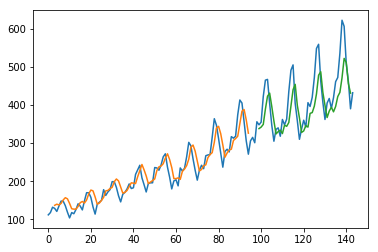

In [27]:
# shift train predictions for plotting
trainPredictPlot = np.zeros_like(dataset)
trainPredictPlot[look_back:len(trainPredict) + look_back, :] = trainPredict
trainPredictPlot = trainPredictPlot.astype('float')
trainPredictPlot[trainPredictPlot == 0] = np.nan

# shift test predictions for plotting
testPredictPlot = np.zeros_like(dataset)
testPredictPlot[len(trainPredict) + (look_back * 2) + 1:len(dataset) - 1, :] = testPredict
testPredictPlot = testPredictPlot.astype('float')
testPredictPlot[testPredictPlot == 0] = np.nan

# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

## Reference

Brownlee J. 2018. Deep Learning with Python. v1.14